# Project Introduction

**Name:** vallalar  
**Dataset:** AB_NYC_2019 (New York City Airbnb listings)

This notebook explores the AB_NYC_2019 dataset to understand the structure of the listings and surface basic insights. It starts with loading the data, reviewing schema and summary statistics, and sets up the foundation for further analysis and visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read CSV file
df = pd.read_csv(r"C:\Users\bmuruges\Downloads\archive\AB_NYC_2019.csv")
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [6]:
def drop_missing_essential(df):
    """Remove rows with missing values in key columns needed for analysis."""
    cols = ["price", "room_type", "neighbourhood_group"]
    return df.dropna(subset=cols)


def remove_price_outliers(df, min_price=10, max_price=1000):
    """Remove listings with prices outside the specified min/max range."""
    return df[(df["price"] >= min_price) & (df["price"] <= max_price)]


def remove_extreme_minimum_nights(df, max_nights=365):
    """Remove listings where minimum_nights is greater than the given max_nights."""
    if "minimum_nights" not in df.columns:
        return df
    return df[df["minimum_nights"] <= max_nights]


def fill_missing_reviews_per_month(df):
    """Fill missing reviews_per_month values with 0, assuming no reviews yet."""
    if "reviews_per_month" not in df.columns:
        return df
    df = df.copy()
    df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
    return df

In [7]:
# Apply cleaning functions

df_clean = drop_missing_essential(df)
df_clean = remove_price_outliers(df_clean)
df_clean = remove_extreme_minimum_nights(df_clean)
df_clean = fill_missing_reviews_per_month(df_clean)

print("Original rows:", len(df))
print("Cleaned rows:", len(df_clean))

df_clean.head()

Original rows: 48895
Cleaned rows: 48631


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
def eda_summary(df):
    """Print basic shape, dtypes, and numeric summary statistics for the DataFrame."""
    print("Shape:", df.shape)
    print("\nColumn types:")
    print(df.dtypes)
    print("\nSummary statistics (numeric columns):")
    print(df.describe())


def eda_price_by_neighbourhood(df):
    """Show average price by neighbourhood_group and room_type (top 10 rows)."""
    required = {"neighbourhood_group", "room_type", "price"}
    if not required.issubset(df.columns):
        print("Required columns missing:", required - set(df.columns))
        return
    grouped = (
        df.groupby(["neighbourhood_group", "room_type"])["price"]
          .mean()
          .round(2)
          .reset_index()
          .sort_values("price", ascending=False)
    )
    print("\nAverage price by neighbourhood_group and room_type (top 10):")
    print(grouped.head(10))


# Run EDA functions on cleaned data
eda_summary(df_clean)
eda_price_by_neighbourhood(df_clean)

Shape: (48631, 16)

Column types:
id                                  int64
name                                  str
host_id                             int64
host_name                             str
neighbourhood_group                   str
neighbourhood                         str
latitude                          float64
longitude                         float64
room_type                             str
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                           str
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Summary statistics (numeric columns):
                 id       host_id      latitude     longitude         price  \
count  4.863100e+04  4.863100e+04  48631.000000  48631.000000  48631.000000   
mean   1.901839e+07  6.762227e+07     40.728938    -73.952049    141.312866   
std 

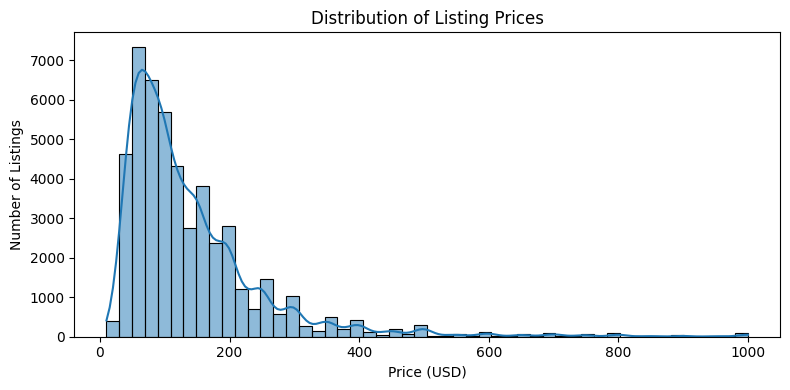

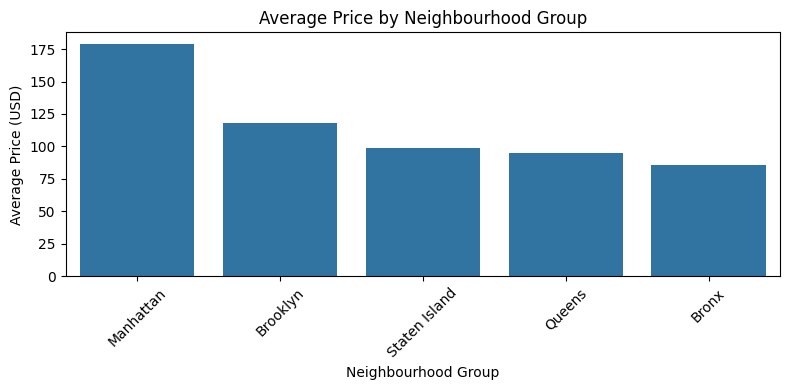

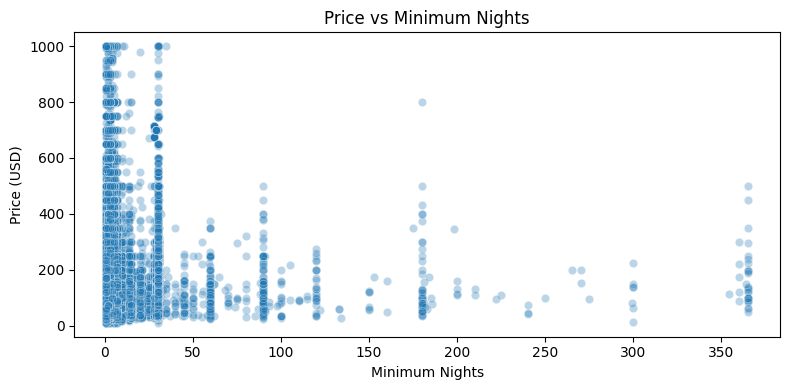

In [9]:
# Visualizations using cleaned data

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of listing prices
plt.figure(figsize=(8, 4))
sns.histplot(df_clean["price"], bins=50, kde=True)
plt.title("Distribution of Listing Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

# 2. Average price by neighbourhood group
plt.figure(figsize=(8, 4))
avg_price_neighbourhood = (
    df_clean.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
)
sns.barplot(x=avg_price_neighbourhood.index, y=avg_price_neighbourhood.values)
plt.title("Average Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Relationship between price and minimum nights
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_clean, x="minimum_nights", y="price", alpha=0.3)
plt.title("Price vs Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

# Airbnb NYC Analysis – Summary and Interpretation

## What I Learned
- Explored the AB_NYC_2019 dataset of New York City Airbnb listings.
- Built a small cleaning and analysis pipeline to prepare the data.
- Produced a cleaner dataset that is better suited for answering questions about price, location, and listing characteristics.

## Interesting Patterns and Insights
- Price distribution is highly skewed: most listings are relatively affordable, with a small number of very expensive properties.
- Average prices vary clearly across neighbourhood groups and room types, showing strong effects of location and listing type on cost.
- The relationship between price and minimum_nights is noisy, indicating that length of stay alone does not explain price very well.

## Limitations and Assumptions
- Analysis is based on a single snapshot in time, so it does not capture seasonality or long‑term market changes.
- Cleaning rules (price range, maximum minimum_nights) are heuristic and may remove some unusual but valid listings.
- Focuses on a limited set of variables; factors such as availability, number of reviews, and host behavior are not deeply examined.

## Surprises and Open Questions
- Surprising concentration of listings at lower price levels despite the presence of very high‑priced properties.
- Unclear how often the most expensive listings are actually booked and how their review patterns compare to cheaper options.
- Future work could explore time‑based trends, richer feature engineering, and predictive models for price or demand.